In [1]:
#import stumpy
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle
from fbprophet import Prophet
from prophet.plot import plot_yearly
from sklearn.metrics import mean_squared_error

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    df3_Final['WeekNo'] = df3_Final.index.isocalendar().week
    
    return df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst = df_origen(origen,destino)
#df1_Final.head(5)
#df2_Final.head(5)
#df3_Final.head(5)

In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-01':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data5=df2_Final.loc['2020-07-01':'2020-07-31']
data6=df3_Final.loc['2020-08-01':'2020-08-31']
#data6.tail(5)

In [5]:
##### Creamos tablas con cada uno de los principales trayectos
lista_periodos=[1,2,3,4,5,6]    
dict_dias={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
        
for periodo in lista_periodos:        
    cont=0
    globals()[f"d{periodo}"] = globals()[f"data{periodo}"].reset_index()                                
    globals()[f"df_{periodo}"] = pd.DataFrame(data=globals()[f"d{periodo}"], columns=['ds',listaDst[1],'Hora','Fecha','WeekNo','ID_Dia'])
    globals()[f"df_{periodo}"].set_index([listaDst[1]], inplace = True) 
    
    for dia in dict_dias:        
        globals()[f"df_{dict_dias[dia]}_{periodo}"] = globals()[f"df_{periodo}"].loc[globals()[f"df_{periodo}"].loc[:,'ID_Dia'] == cont]  # Seleccionamos solo los datos del lunes o solo los datos del martes para crear nuevas tablas dependiendo del día        
        globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = pd.DataFrame({})  #Creamos un nuevo dataframe vacio
        globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
        
        #Seleccionamos celdas del dataframe para generar las fechas que se requieren graficar
        start = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].iloc[0]['Fecha'] #Primera celda de la columna fecha
        period_start = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].iloc[0]['WeekNo']
        period_end = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].at[globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].index[-1],'WeekNo']  #última celda de columna WeekNo
        
        #Condición de error en period_start/period_end
        if (type(period_start) == pd.core.series.Series) | (type(period_end) == pd.core.series.Series):    
            lista = list(period_end)
            period_end = lista[-1]        
        
        periods = list(range(period_start, period_end+1))

        #Obtenemos las fechas de cada día 
        date_generated = pd.date_range(start, periods=len(periods), freq='7D')
        
        #Creamos una tabla para cada fecha de cada lunes o de cada martes..
        cont2=1        
        for date in date_generated:            
            globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}_{cont2}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].loc[globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].loc[:,'Fecha'] == date]
            cont2=cont2+1
        cont=cont+1
    

/tmp/ipykernel_3981/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/tmp/ipykernel_3981/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtra

/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/tmp/ipykernel_3981/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard li

# Periodo 1 - Lunes

In [6]:
period1 = filtrado_Data_Monday_3
period2 = filtrado_Data_Monday_4
period3 = filtrado_Data_Monday_5
period4 = filtrado_Data_Monday_6
desescalada = pd.concat([period1,period2,period3,period4])
start_date = pd.Timestamp('2020-05-02')
end_date = pd.Timestamp('2020-08-31')
mask = (desescalada['Fecha'] >= start_date) & (desescalada['Fecha'] <= end_date)
desescalada = desescalada.loc[mask]
desescalada = desescalada.reset_index()
desescalada = desescalada.set_index(["ds"])
#desescalada.tail(50)

/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


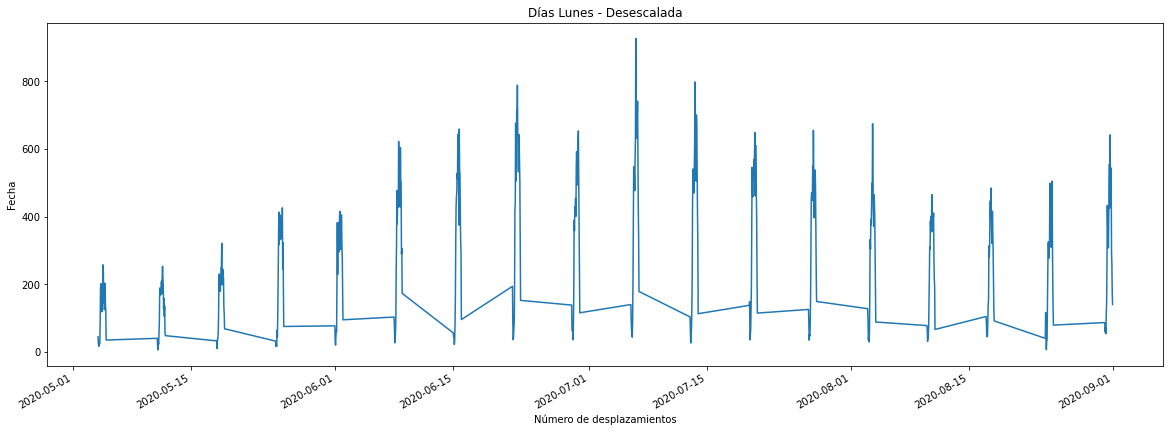

In [7]:
desescalada[desescalada.columns[0]].plot(figsize=(20,7), legend=None, title='Días Lunes - Desescalada')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()


# Patrón Trayecto - Día (Lunes) - Hora (8Am)

In [8]:
filtrar_Hora = desescalada.loc[desescalada.loc[:,'Hora'] == 8]
filtrar_Hora.head()

,2807905-2807901,Hora,Fecha,WeekNo,ID_Dia
ds,,,,,
2020-05-04 08:00:00,201.729,8,2020-05-04,19,0
2020-05-11 08:00:00,180.508,8,2020-05-11,20,0
2020-05-18 08:00:00,230.382,8,2020-05-18,21,0
2020-05-25 08:00:00,304.809,8,2020-05-25,22,0
2020-06-01 08:00:00,228.754,8,2020-06-01,23,0


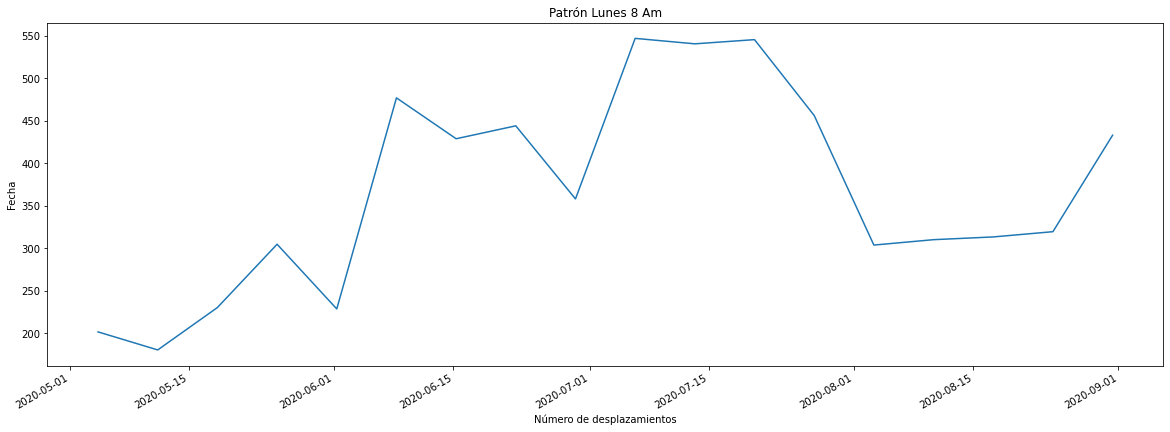

In [9]:
filtrar_Hora[filtrar_Hora.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 8 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Patrón Trayecto - Día (Lunes) - Hora (2PM)

In [10]:
filtrar_Hora = desescalada.loc[desescalada.loc[:,'Hora'] == 14]
filtrar_Hora.head()

,2807905-2807901,Hora,Fecha,WeekNo,ID_Dia
ds,,,,,
2020-05-04 14:00:00,257.542,14,2020-05-04,19,0
2020-05-11 14:00:00,221.336,14,2020-05-11,20,0
2020-05-18 14:00:00,247.423,14,2020-05-18,21,0
2020-05-25 14:00:00,386.409,14,2020-05-25,22,0
2020-06-01 14:00:00,415.837,14,2020-06-01,23,0


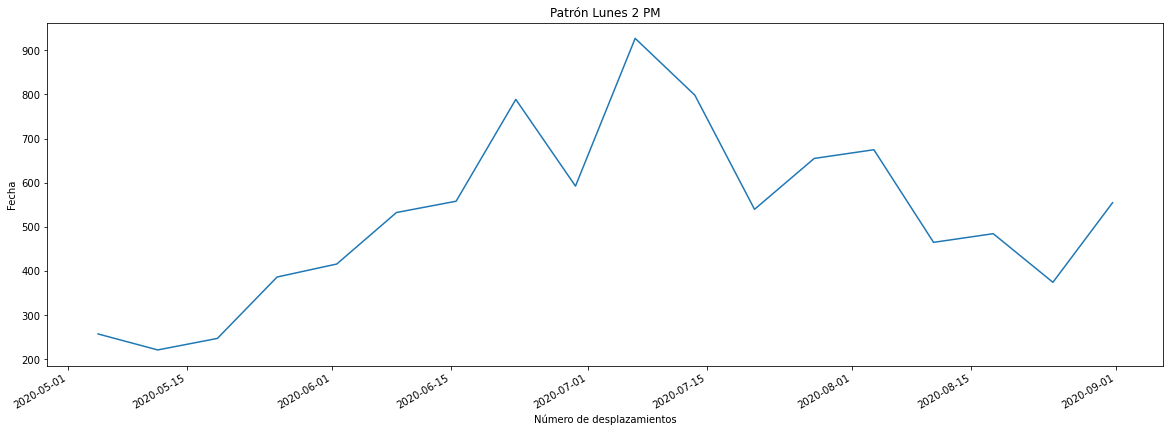

In [11]:
filtrar_Hora[filtrar_Hora.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 2 PM')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Patrón Trayecto - Día (Lunes) - Hora (2PM)

In [13]:
filtrar_Hora = desescalada.loc[desescalada.loc[:,'Hora'] == 10]
filtrar_Hora.head()

,2807905-2807901,Hora,Fecha,WeekNo,ID_Dia
ds,,,,,
2020-05-04 10:00:00,182.811,10,2020-05-04,19,0
2020-05-11 10:00:00,173.302,10,2020-05-11,20,0
2020-05-18 10:00:00,224.145,10,2020-05-18,21,0
2020-05-25 10:00:00,317.099,10,2020-05-25,22,0
2020-06-01 10:00:00,326.056,10,2020-06-01,23,0


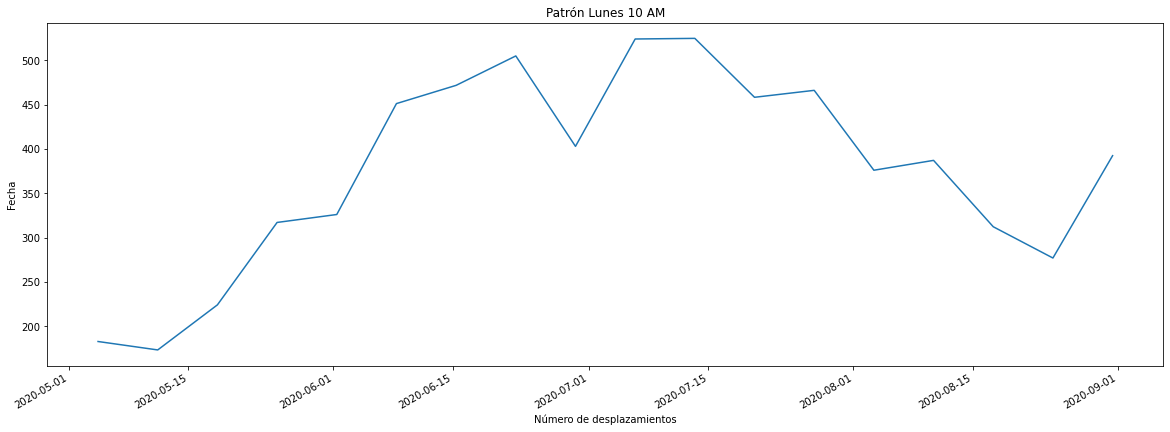

In [14]:
filtrar_Hora[filtrar_Hora.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 10 AM')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Periodo 1 - Desescalada y Nueva Normalidad (2 mayo 2020-31 Agosto 2020)

In [10]:
Periodo1 = pd.concat([data3,data4,data5,data6])
Periodo1 = Periodo1.drop(columns=['Fecha','Año','Mes','ID_Dia','Hora','WeekNo'])
Periodo1 = Periodo1.reset_index()
Periodo1 = Periodo1.rename(columns={'2807905-2807901':'y'})
Periodo1.tail()

,ds,y
2947,2020-08-31 19:00:00,509.100
2948,2020-08-31 20:00:00,293.615
2949,2020-08-31 21:00:00,256.641
2950,2020-08-31 22:00:00,172.866
2951,2020-08-31 23:00:00,140.111


# PROPHET
## Definimos datos de entrenamiento y datos de prueba

In [11]:
X = Periodo1.y
Y = Periodo1.ds
size = int(len(X) * 0.9)
train_X, test_X = X[0:size], X[size:len(X)]
train_Y, test_Y = Y[0:size], Y[size:len(Y)]
    
Train = pd.concat([train_Y,train_X], axis=1)
Test = pd.concat([test_Y,test_X], axis=1)

In [12]:
Test.head()

,ds,y
2656,2020-08-19 16:00:00,447.718
2657,2020-08-19 17:00:00,492.218
2658,2020-08-19 18:00:00,356.899
2659,2020-08-19 19:00:00,391.765
2660,2020-08-19 20:00:00,303.351


## Hacemos ciclo for para predecir el día siguiente uno tras otro
## La predicción se demora 24 minutos

In [13]:
predictions = list()

# Se crea una función de predicción continua
def rolling_forecast():   
    history = Train.copy()
    
    for t in range(len(test_X)):
        m = Prophet()
        m.fit(history);
        
        #future es el Dataframe con todas las fEchas de entrenamiento y va agregando fechas futuras en cada ciclo
        future = m.make_future_dataframe(periods=1, freq='H')   
        
        #forecast contiene todos los datos de entrenamiento, además va agregando 1 a 1 las predicciones
        forecast = m.predict(future)         
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        
        # La variable yhat contiene la predicción en cada ciclo 
        yhat = output[['yhat']][len(history):].values[0][0]         
        predictions.append(yhat)
        
        #obs crea un nuevo datafRame en cada ciclo con la fecha a predecir y el valor real
        obs = pd.DataFrame(Test[['ds','y']].iloc[t]) #t inicia en 0 hasta la longitud de test_x          
        
        #history concatena los datos de entrenamiento y los datos de prueba (test)
        history = pd.concat([history, obs.transpose()],axis=0)
        
        
        print('predicted=%f, expected=%f' % (yhat, obs.transpose()['y']))

rolling_forecast()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.1139
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4973.28    0.00230972       87.5676      0.2909           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       4973.45   0.000368681       125.493   6.184e-06       0.001      173  LS failed, Hessian reset 
     156       4973.67   0.000175658       90.0061   1.297e-06       0.001      285  LS failed, Hessian reset 
     199       4973.73    0.00107646       54.2556           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       4973.74   1.33179e-05       53.2249   2.304e-07       0.001      434  LS failed, Hessian reset 
     239       4973.74   9.18409e-09        48.559     0.01276      0.9787      452   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


predicted=377.422351, expected=447.718000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -59.0999
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4975.47    0.00286439       71.3204           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       4975.66   0.000626668       187.957   7.156e-06       0.001      187  LS failed, Hessian reset 
     138       4975.84   1.01825e-05        40.066   1.865e-07       0.001      268  LS failed, Hessian reset 
     153       4975.84   1.94037e-07       50.0178      0.1151       0.506      293   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


KeyboardInterrupt: 

# Calculamos RMSE
## Se obtiene un RMSE de 76.90

In [ ]:
# Se obtiene un RMSE de 76.90
error_PROPHET = mean_squared_error(test_X, predictions) **0.5
print('Test RMSE: %.3f' % error_PROPHET)

# Comparamos la curva de prueba y la curva predicha

In [ ]:
X = Periodo1['y'].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]

RollBack=pd.concat([pd.DataFrame({'TEST':test}),pd.DataFrame({'Prophet':predictions})],axis=1)
RollBack.head()

In [ ]:
RollBack[['TEST', 'Prophet']].plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('time', fontsize=15);

In [ ]:
fig = m.plot_components(forecast)